# Correlation between BTC and ETH

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## Grab Data

In [2]:
tickers = yf.Tickers("BTC-GBP ETH-GBP")

In [3]:
data = {}
for t in tickers.tickers:
    data[t.info['name']] = t.history(start='2019-09-18', end='2021-02-08')

In [4]:
data['Bitcoin'].head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-09-18,8197.314453,8239.856445,8172.131836,8177.567383,12965489944,0,0
2019-09-19,8179.369629,8220.402344,7865.916016,8197.044922,15918910635,0,0
2019-09-20,8196.967773,8246.955078,8123.733398,8163.385254,11813504898,0,0
2019-09-21,8164.994629,8168.562012,8018.317871,8033.558594,10764043294,0,0
2019-09-22,8037.084961,8079.069824,7957.246582,8075.819824,10585289084,0,0


In [5]:
data['Ethereum'].head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-09-18,166.421753,173.772278,166.827454,169.507614,7372809666,0,0
2019-09-19,169.390701,177.948105,163.427887,176.677933,8479415079,0,0
2019-09-20,176.509293,177.672180,172.509628,174.827087,6436629073,0,0
2019-09-21,174.704666,177.158844,172.381760,172.795502,6208392197,0,0
2019-09-22,172.771744,173.287552,166.518143,169.646072,6265417160,0,0


## Explore Correlations of Returns

**Training data**: 2019-09-18 to 2020-10-31, **Test data**: 2020-11-01 - 2021-02-08

In [6]:
btc_returns = data['Bitcoin'][:'2020-11-01'].Close.pct_change()
btc_returns.name = 'Bitcoin'
eth_returns = data['Ethereum'][:'2020-11-01'].Close.pct_change()
eth_returns.name= 'Ethereum'
diff = btc_returns - eth_returns

A 1 std move in bitcoin is equivalent to a 0.8std move in ethereum

In [7]:
pd.concat([btc_returns,eth_returns], axis=1).corr()

,Bitcoin,Ethereum
Bitcoin,1.000000,0.867692
Ethereum,0.867692,1.000000


Text(0.5, 1.0, 'Distribution of Difference in Returns')

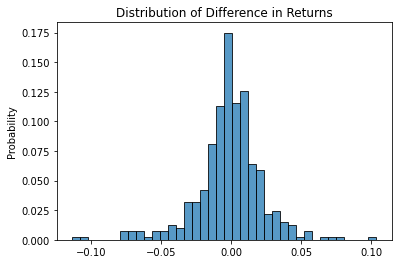

In [8]:
sns.histplot(diff, stat='probability')
plt.title('Distribution of Difference in Returns')

In [9]:
print('std: {:.4f}, mean: {:.4f}'.format(diff.std(), diff.mean()))

std: 0.0239, mean: -0.0013


Text(0.5, 1.0, 'BTC Returns - ETH Returns')

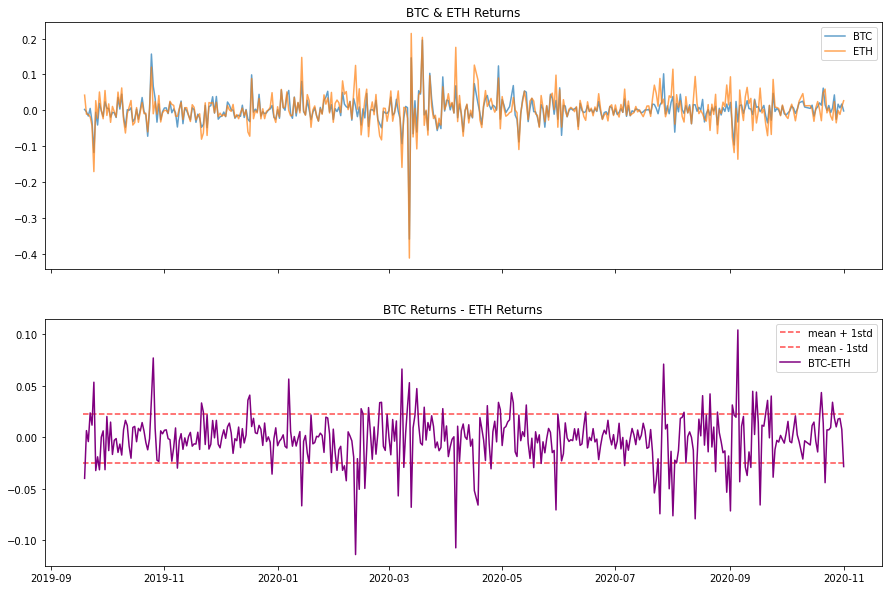

In [10]:
high_line = pd.Series(data=(diff.mean() + diff.std())*np.repeat(1,len(btc_returns)), index=btc_returns.index)
low_line = pd.Series(data=(diff.mean() - diff.std())*np.repeat(1,len(btc_returns)), index=btc_returns.index)
fig, ax = plt.subplots(2,1, figsize=(15,10), sharex=True)
ax[0].plot(btc_returns, label='BTC', alpha=0.7)
ax[0].plot(eth_returns, label='ETH', alpha=0.7)
ax[0].legend()
ax[0].set_title('BTC & ETH Returns')
ax[1].plot(high_line, color='red', linestyle='--', alpha=0.7, label='mean + 1std')
ax[1].plot(low_line, color='red', linestyle='--', alpha=0.7, label='mean - 1std')
ax[1].plot(diff, label='BTC-ETH', color='purple')
ax[1].legend()
ax[1].set_title('BTC Returns - ETH Returns')